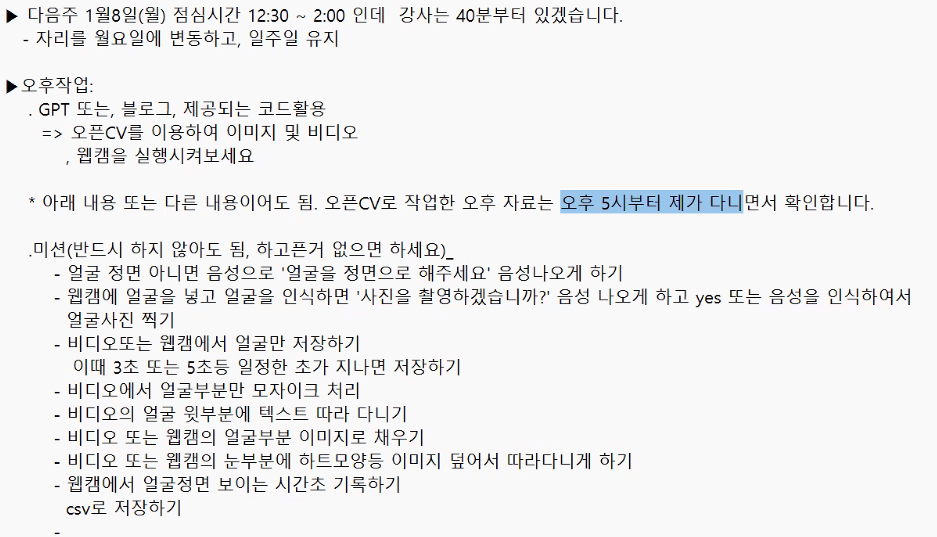


먼저 음성 출력을 위한 Text-to-Speech(TTS)엔진을 사용하기 위해 Google TTs 라이브러리를 설치함. 음성 인식을 위한 라이브러리도 설치함.(근데 안됨)
키보드로 y 누르면 촬영하는 코드때문에 키보드 라이브러리 설치하겠음.

In [ ]:
# !pip install gtts

In [ ]:
# !pip install SpeechRecognition

In [9]:
# !pip install keyboard

     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ------- -------------------------------- 10.2/58.1 kB ? eta -:--:--
     ------------- ------------------------ 20.5/58.1 kB 162.5 kB/s eta 0:00:01
     ------------- ------------------------ 20.5/58.1 kB 162.5 kB/s eta 0:00:01
     -------------------------------------- 58.1/58.1 kB 306.8 kB/s eta 0:00:00


In [6]:
## 모듈 import

from glob import glob
import cv2
from gtts import gTTS
# import speech_recognition as sr
import os
import keyboard
import time

In [7]:
import cv2
img_path = 'C:\\Users\\bluecom009\\Desktop\\AI\\데이터_분석을_위한_파이썬\\2024_01_04~05 강의자료\\2._영상물과_미디어파이프\\01._비디오기초\\얼굴.jpg'
img = cv2.imread(img_path)

if img is not None:
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("이미지를 읽을 수 없습니다.")

이미지를 읽을 수 없습니다.


In [4]:
img_path = 'C:\\Users\\bluecom009\\Desktop\\AI\\데이터_분석을_위한_파이썬\\2024_01_04~05 강의자료\\2._영상물과_미디어파이프\\01._비디오기초\\얼굴.jpg'
img_path_fixed = img_path.replace('\\', '/')

print(img_path_fixed)

C:/Users/bluecom009/Desktop/AI/데이터_분석을_위한_파이썬/2024_01_04~05 강의자료/2._영상물과_미디어파이프/01._비디오기초/얼굴.jpg


In [9]:
# 사전에 학습된 전면 얼굴 기본 검출기
# cascade_face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Weights/Cascades/haarcascade_frontalface_default.xml')
# 위는 코랩에 저장할때 쓰는 코드

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img_path = 'C:/Users/bluecom009/Desktop/AI/데이터_분석을_위한_파이썬/2024_01_04~05 강의자료/2._영상물과_미디어파이프/01._비디오기초/sample.jpg'

if os.path.exists(img_path):
    # 얼굴 이미지 불러오기
    img = cv2.imread(img_path)

    # interpilation 인자를 통해 양선형 보간법 사용. dsize는 결과 영상의 크기.
    img_resized = cv2.resize(img, dsize=(1200, 600), interpolation=cv2.INTER_LINEAR)

    # 채널을 줄여서 그레이스케일로 변환 -> 얼굴과 눈이 더 안정적이고 뚜렷하게 검출됨.
    gray = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2GRAY)

    # 얼굴 찾기
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # faces 얼굴이 검출된 개체 정보를 튜플(위치정보)의 리스트로 반환함.

    if len(faces) > 0:
        for (x, y, w, h) in faces:
        # img -> 그림 그릴 이미지.
        # (x, y) -> 얼굴이 검출된 사각형의 왼쪽 상단 꼭지점 좌표.
        # (x + w, y + h) -> 얼굴이 검출된 사각형의 우측 하단 꼭지점 좌표.
        # 여기서 w가 얼굴의 너비,  h가 얼굴의 높이
        # (255, 0, 0) -> 사각형의 색깔
        # 2 -> 사각형의 두께
            cv2.rectangle(img_resized, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # 눈 찾기
            roi_color = img_resized[y:y + h, x:x + w]
            roi_gray = gray[y:y + h, x:x + w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    else:
        tts = gTTS(text="얼굴을 정면으로 해주세요.")
        tts.save('output.mp3')
        os.system('start output.mp3')
else:
    print(f"파일 '{img_path}'을 찾을 수 없습니다.")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


### 웹캠에서 비디오 인식 후~ 

In [ ]:
# 음성 인식을 위한 객체 생성
recognizer = sr.Recognizer()

# 음성으로 'Yes'를 말할 때까지 대기하는 함수
def wait_for_yes():
    with sr.Microphone() as source:
        print("말해주세요...")
        audio = recognizer.listen(source)

    try:
        text = recognizer.recognize_google(audio, language='ko-KR')
        print("인식된 음성: ", text)
        return text.lower() == 'yes'
    except sr.UnknownValueError:
        print("음성을 인식할 수 없습니다.")
        return False
    except sr.RequestError as e:
        print(f"음성 서비스에 오류가 있습니다: {e}")
        return False


In [17]:
import cv2
webcam = cv2.VideoCapture(0)
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# 저장 간격을 설정할 시간 간격 (초)
save_interval = 5
next_save_time = time.time() + save_interval

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



while webcam.isOpened():
    ret, frame = webcam.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 사진을 흑백으로 바꿔준다
        faces = face_cascade.detectMultiScale(gray, 1.3, 5) # 얼굴 구하기 - 필요한 상수

        if len(faces) < 0:
            tts = gTTS(text="얼굴을 정면으로 해주세요.")
            tts.save('output.mp3')
            os.system('start output.mp3')
        else:
            tts = gTTS(text="사진을 촬영하시겠습니까?")
            tts.save('capture.mp3')
            os.system('start capture.mp3')

            # # 키보드 입력이 'y'이면 사진 촬영
            # if keyboard.read_key() == 'y':
            #     # 'y'가 입력되면 사진 촬영
            #     photo_filename = '웹캠_얼굴.jpg'
            #     cv2.imwrite(photo_filename, frame)
            #     print(f"사진이 {photo_filename}에 저장되었습니다.")
            #     break

            # 일정한 간격으로 사진 촬영 및 저장
            # current_time = time.time()
            # if current_time >= next_save_time:
            #     photo_filename = f'웹캠_촬영_{int(current_time)}.jpg'
            #     cv2.imwrite(photo_filename, frame)
            #     print(f"사진이 {photo_filename}에 저장되었습니다.")
            #     next_save_time = current_time + save_interval

            cv2.imwrite('얼굴.jpg', frame) # 사진 저장

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [18]:
import cv2
webcam = cv2.VideoCapture(0)
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# # 저장 간격을 설정할 시간 간격 (초)
# save_interval = 5
# next_save_time = time.time() + save_interval

# 얼굴 촬영 설정
capture_interval = 3  # 촬영 간격 (초)
max_capture_count = 5  # 최대 촬영 횟수

# 촬영된 이미지를 저장할 폴더 생성
output_folder = "captured_faces"
os.makedirs(output_folder, exist_ok=True)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [4]:
import cv2


webcam = cv2.VideoCapture(0)
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# # 저장 간격을 설정할 시간 간격 (초)
# save_interval = 5
# next_save_time = time.time() + save_interval

# 얼굴 촬영 설정
capture_interval = 3  # 촬영 간격 (초)
max_capture_count = 5  # 최대 촬영 횟수

# 촬영된 이미지를 저장할 폴더 생성
output_folder = "captured_faces"
os.makedirs(output_folder, exist_ok=True)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def capture_and_save_face(frame):
    # 얼굴 검출
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    if len(faces) > 0:
        # 얼굴이 검출되면 사각형 그리기
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # '사진을 촬영하겠냐?' 음성 출력
        tts = gTTS(text="사진을 촬영하시겠습니까?")
        tts.save('capture.mp3')
        os.system('start capture.mp3')

        # 키보드 'y' 입력 대기
        keyboard.wait('y')

        # 얼굴 부분만 촬영하여 저장
        for i, (x, y, w, h) in enumerate(faces):
            face_roi = frame[y:y+h, x:x+w]
            filename = f"{output_folder}/captured_face_{i + 1}.jpg"
            cv2.imwrite(filename, face_roi)
            print(f"얼굴 이미지가 {filename}에 저장되었습니다.")



    else:
        tts = gTTS(text="얼굴을 정면으로 해주세요.")
        tts.save('output.mp3')
        os.system('start output.mp3')
# 얼굴이 검출되지 않았을 때 사용할 변수 정의
voice_output_done = False

# 촬영 루프 시작
capture_count = 0
start_time = time.time()

while webcam.isOpened() and capture_count < max_capture_count:
    ret, frame = webcam.read()

    if not ret:
        print("Failed to grab frame")
        break

    # 화면에 프레임 표시
    cv2.imshow('Face Detection', frame)

    # 일정 간격으로 얼굴 촬영
    current_time = time.time()
    if current_time - start_time >= capture_interval:
        capture_and_save_face(frame)
        start_time = current_time
        capture_count += 1
        voice_output_done = True  # 음성 출력이 된 상태로 설정

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 비디오 캡처 객체 해제 및 창 닫기
webcam.release()
cv2.destroyAllWindows()

NameError: name 'voice_output_done' is not defined

: 

In [3]:

while webcam.isOpened():
    ret, frame = webcam.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 사진을 흑백으로 바꿔준다
        faces = face_cascade.detectMultiScale(gray, 1.3, 5) # 얼굴 구하기 - 필요한 상수

        if len(faces) < 0:
            tts = gTTS(text="얼굴을 정면으로 해주세요.")
            tts.save('output.mp3')
            os.system('start output.mp3')
        else:
            tts = gTTS(text="사진을 촬영하시겠습니까?")
            tts.save('capture.mp3')
            os.system('start capture.mp3')

            # # 키보드 입력이 'y'이면 사진 촬영
            # if keyboard.read_key() == 'y':
            #     # 'y'가 입력되면 사진 촬영
            #     photo_filename = '웹캠_얼굴.jpg'
            #     cv2.imwrite(photo_filename, frame)
            #     print(f"사진이 {photo_filename}에 저장되었습니다.")
            #     break

            # 일정한 간격으로 사진 촬영 및 저장
            # current_time = time.time()
            # if current_time >= next_save_time:
            #     photo_filename = f'웹캠_촬영_{int(current_time)}.jpg'
            #     cv2.imwrite(photo_filename, frame)
            #     print(f"사진이 {photo_filename}에 저장되었습니다.")
            #     next_save_time = current_time + save_interval

            cv2.imwrite('얼굴.jpg', frame) # 사진 저장

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()

NameError: name 'face_cascade' is not defined